# Reading & visualizaing raw data, cropping, filtering, and saving

In [ ]:
import matplotlib
import pathlib
import mne

Ensure Matplotlib uses the `Qt5Agg` backend, which is the best choice for MNE-Python's interactive plotting functions.

In [4]:
matplotlib.use('Qt5Agg')

Retrieve the storage location of the `sample` data, and download the dataset if it cannot be found.

In [6]:
sample_data_dir = mne.datasets.sample.data_path()

# Convert to a pathlib.Path for more convenience
sample_data_dir = pathlib.Path(sample_data_dir)
sample_data_dir

PosixPath('/Users/ioannataouki/mne_data/MNE-sample-data')

## Load some raw data!

In [7]:
raw_path = sample_data_dir / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_path,preload=True)
raw


Opening raw data file /Users/ioannataouki/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~482.2 MB, data loaded>

## Let's visualize the raw data!

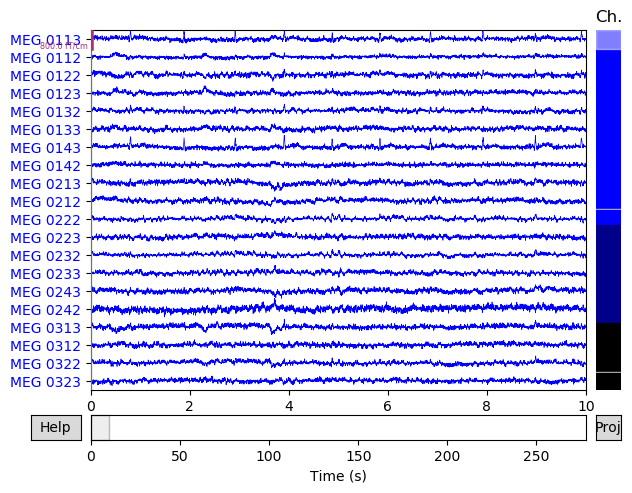

In [8]:
raw.plot()

## Extract events from the `STIM` channels

In [9]:
events = mne.find_events(raw)

320 events found
Event IDs: [ 1  2  3  4  5 32]


In [10]:
event_id = {
    'Auditory/Left': 1,
    'Auditory/Right': 2,
    'Visual/Left': 3,
    'Visual/Right': 4,
    'Smiley': 5,
    'Button': 32
}
event_id

{'Auditory/Left': 1,
 'Auditory/Right': 2,
 'Visual/Left': 3,
 'Visual/Right': 4,
 'Smiley': 5,
 'Button': 32}

In [11]:
len(events[events[:, 2] == 32])
len(events[(events[:, 2] == 3) | (events[:, 2] == 4)])

144

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>How many <strong>visual</strong> events are in the data?</li>
    </ul>
</div>

## Plot the raw data again, but add event markers

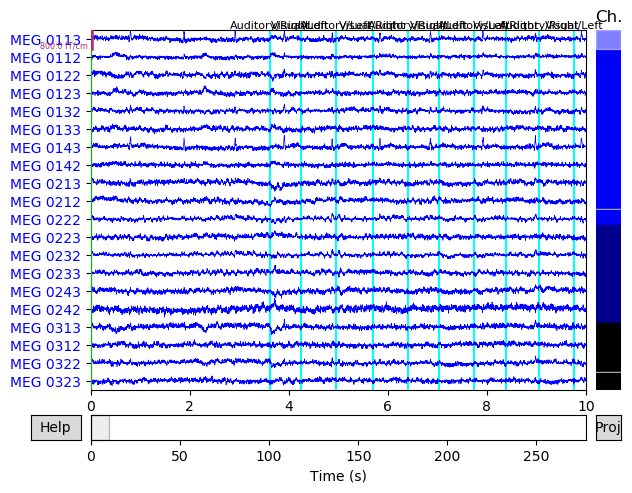

In [12]:
raw.plot(events=events, event_id=event_id)

In [13]:
raw.info

<Info | 24 non-empty fields
    acq_pars : str | 13886 items
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 49 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 172.17630004882812 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : str | 4 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off
    sfreq : float | 600.614990234375 Hz
    acq_s

In [14]:
raw.info['meas_date']

(1038942070, 720100)

In [15]:
raw.info['sfreq']

600.614990234375

In [16]:
raw.info['bads']

['MEG 2443', 'EEG 053']

In [17]:
raw.ch_names[:10]

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143']

In [18]:
raw.info['chs'][0]

{'scanno': 1,
 'logno': 113,
 'kind': 1,
 'range': 0.00030517578125,
 'cal': 3.1600000394149674e-09,
 'coil_type': 3012,
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
        -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
         0.18674099,  0.013541  ]),
 'unit': 201,
 'unit_mul': 0,
 'ch_name': 'MEG 0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

## Visualize the sensor locations

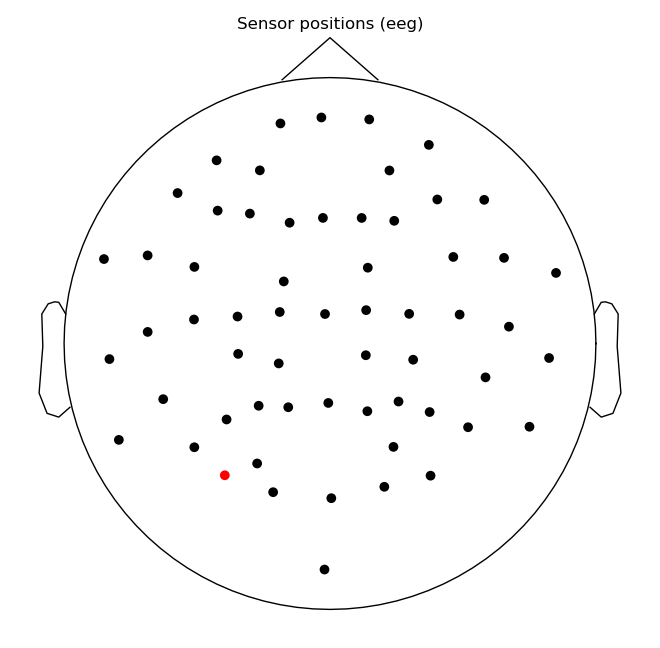

In [23]:
raw.plot_sensors(ch_type='eeg')

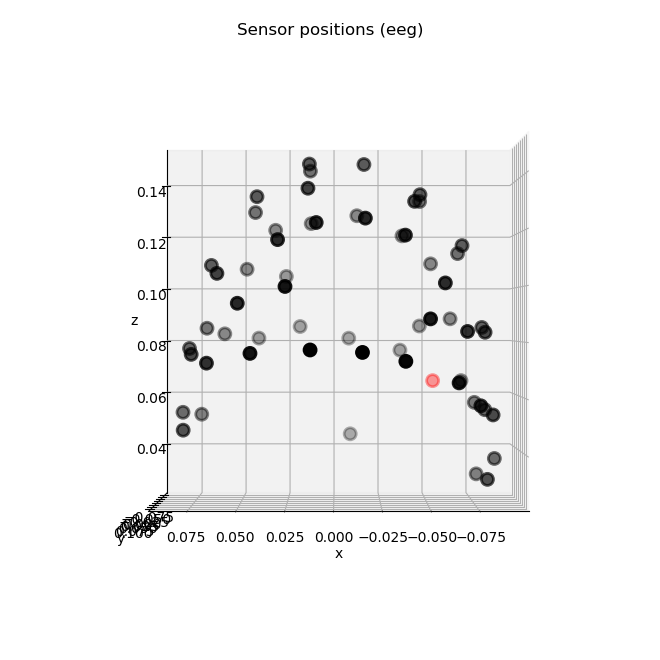

Traceback (most recent call last):
  File "/Users/ioannataouki/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/ioannataouki/opt/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py", line 1670, in _close_event
    if getattr(fig, 'lasso') is not None:
AttributeError: 'Figure' object has no attribute 'lasso'


In [24]:
raw.plot_sensors(kind='3d', ch_type='eeg')

## Mark channels as bad

Mark an additional EEG channel as bad and view the topoplot.

In [19]:
raw.info['bads']

['MEG 2443', 'EEG 053']

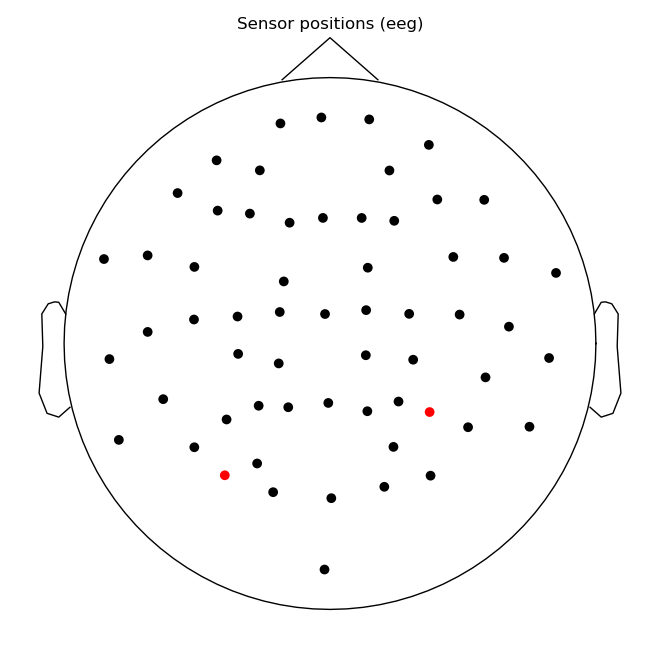

In [20]:
raw.info['bads'] += ['EEG 051']
raw.plot_sensors(ch_type='eeg')

## Select only a subset of the channels

In [21]:
raw_eeg = raw.copy().pick_types(meg='mag', eeg=False, eog=False, exclude=[])
len(raw_eeg.ch_names)

102

In [22]:
raw_eeg.info

<Info | 24 non-empty fields
    acq_pars : str | 13886 items
    bads : list | 0 items
    ch_names : list | MEG 0111, MEG 0121, MEG 0131, MEG 0141, MEG 0211, ...
    chs : list | 102 items (MAG: 102)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 49 items
    dev_head_t : Transform | 3 items
    dig : Digitization | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 172.17630004882812 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 102
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : str | 4 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off
    sfreq : float | 600.614990234375 Hz
    acq_stim : NoneType
    ctf_head_t : NoneType
    de

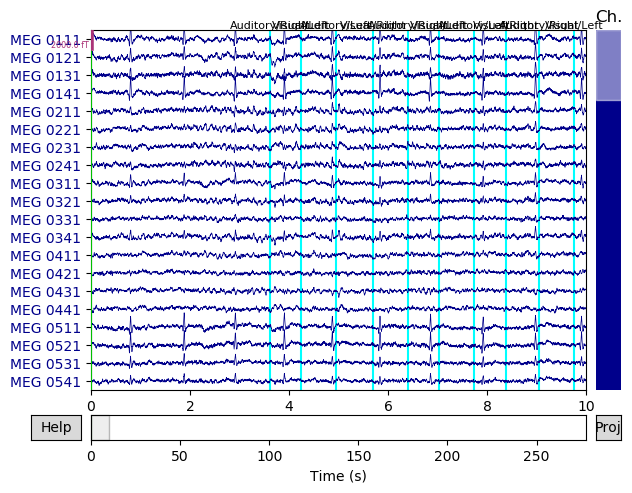

In [48]:
raw_eeg.plot(events=events, event_id=event_id)

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>Select only MEG channels ("meg")</li>
         <li>Select only magnetometer channels ("mag")</li>
    </ul>
</div>

## Crop and filter the data

In [23]:
#this will crop the data in a duration of 100 ms
raw_eeg_cropped = raw_eeg.copy().crop(tmax=100)
#looking at the last element of the list
raw_eeg_cropped.times[-1]

99.99916914588277

In [27]:
raw_eeg_cropped.load_data()
#Defining highpass and lowpass filters
raw_eeg_cropped_filtered = raw_eeg_cropped.filter(l_freq=0.1, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 19821 samples (33.001 sec)



In [30]:
raw_eeg_cropped.load_data()
raw_eeg_cropped_filtered = raw_eeg_cropped.copy().filter(l_freq=1, h_freq=30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1983 samples (3.302 sec)



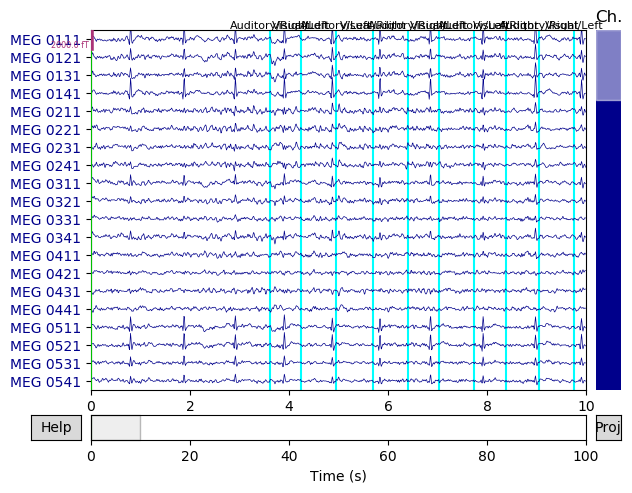

In [31]:
raw_eeg_cropped.plot(events=events, event_id=event_id,title='unfiltered')
raw_eeg_cropped_filtered.plot(events=events, event_id=event_id,title='filtered')

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

raw_eeg_cropped.plot_psd(ax=ax[0], show=False)
raw_eeg_cropped_filtered.plot_psd(ax=ax[1], show=False)

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
fig.set_tight_layout(True)
plt.show()

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


/Users/ioannataouki/opt/anaconda3/lib/python3.7/site-packages/ipykernel/eventloops.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.exec_()
/Users/ioannataouki/opt/anaconda3/lib/python3.7/site-packages/mne/viz/evoked.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  event.canvas.draw()


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>Filter the raw data with a 1 Hz high-pass and a 30 Hz low-pass filter and plot the PSD.</li>
    </ul>
</div>

## Save the data

In [35]:
raw_eeg_cropped_filtered.save(pathlib.Path('out_data') / 'eeg_cropped_filt_raw.fif', 
                              overwrite=True)

Writing /Users/ioannataouki/Downloads/out_data/eeg_cropped_filt_raw.fif
Closing /Users/ioannataouki/Downloads/out_data/eeg_cropped_filt_raw.fif [done]
